## crop augmentation

In [26]:
from utils import augmentation, visulization

base_dir = "../ALICE_lateral_dorsal/ALICE_dorsal_yolo_labelpins/train/"
train_crop = augmentation.aug_crop(base_dir)
# train_vis = visulization.vis_boxes(base_dir)
train_crop.crop()
# train_vis.save_images_boxes(target="images_crop")

base_dir = "../ALICE_lateral_dorsal/ALICE_dorsal_yolo_labelpins/val/"
train_crop = augmentation.aug_crop(base_dir)
# train_vis = visulization.vis_boxes(base_dir)
train_crop.crop()
# train_vis.save_images_boxes(target="images_crop")

Processing images: 100%|█████████████████████████████████████████████████████████████| 105/105 [00:02<00:00, 36.43it/s]


In [2]:
from utils import augmentation, visulization

In [3]:
base_dir = "../ALICE_lateral_dorsal/ALICE_dorsal_yolo_pins/val_aug/"
train_vis = visulization.vis_boxes(base_dir)
train_vis.save_images_boxes(target="images")

Drawing boxes: 100%|███████████████████████████████████████████████████████████████████| 83/83 [00:01<00:00, 64.80it/s]


## convert from coco to yolo

In [3]:
from ultralytics import data
data.converter.convert_coco(labels_dir='../ALICE_lateral_dorsal/ALICE_dorsal_coco_labelpins/', save_dir='../ALICE_lateral_dorsal/ALICE_dorsal_yolo_labelpins/', 
                            use_segments=False, use_keypoints=False, cls91to80=False, lvis=False)

Annotations C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_lateral_dorsal\ALICE_dorsal_coco_labelpins\ALICE_dorsal_E_vu
Annotations C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_lateral_dorsal\ALICE_dorsal_coco_labelpins\ALICE_dorsal_L_fu
Annotations C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_lateral_dorsal\ALICE_dorsal_coco_labelpins\ALICE_dorsal_L_ni
Annotations C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_lateral_dorsal\ALICE_dorsal_coco_labelpins\ALICE_dorsal_L_vi

COCO data converted successfully.
Results saved to C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_lateral_dorsal\ALICE_dorsal_yolo_labelpins


## create dataset

In [1]:
import os
import random
import shutil
random.seed(42)
base_dir = "../ALICE_lateral_dorsal/ALICE_dorsal_yolo_labelpins/mask/"
os.makedirs(base_dir + "train/images", exist_ok=True)
os.makedirs(base_dir + "train/labels", exist_ok=True)
os.makedirs(base_dir + "val/images", exist_ok=True)
os.makedirs(base_dir + "val/labels", exist_ok=True)
split = 0.7

for sp in os.listdir(base_dir + "labels/"):
    sp_labels = os.listdir(base_dir + "labels/" + sp)
    random.shuffle(sp_labels)
    split_num = int(split*len(sp_labels))
    sp_labels_train, sp_labels_val = sp_labels[:split_num], sp_labels[split_num:]
    for label in sp_labels_train:
        source, destination = base_dir + "labels/" + sp + "/" + label, base_dir + "train/labels/" + label
        shutil.copy(source, destination)
        img = label.replace("txt","jpeg")
        source, destination = base_dir + "images/" + sp + "/" + img, base_dir + "train/images/" + img
        shutil.copy(source, destination)
    for label in sp_labels_val:
        source, destination = base_dir + "labels/" + sp + "/" + label, base_dir + "val/labels/" + label
        shutil.copy(source, destination)
        img = label.replace("txt","jpeg")
        source, destination = base_dir + "images/" + sp + "/" + img, base_dir + "val/images/" + img
        shutil.copy(source, destination)

NotADirectoryError: [WinError 267] The directory name is invalid: '../ALICE_lateral_dorsal/ALICE_dorsal_yolo_labelpins/mask/labels/010355902_824879_1485536.2500x5792.txt'

In [5]:
# mask create
import os
import random
import shutil
random.seed(42)
# base_dir = "../ALICE_lateral_dorsal/ALICE_dorsal_yolo_labelpins/mask2/"
base_dir = "../ALICE_labelval/OdoSpin_dataset/"
os.makedirs(base_dir + "train/images", exist_ok=True)
os.makedirs(base_dir + "train/labels", exist_ok=True)
os.makedirs(base_dir + "val/images", exist_ok=True)
os.makedirs(base_dir + "val/labels", exist_ok=True)
split = 0.7

sp_labels = os.listdir(base_dir + "labels/")
random.shuffle(sp_labels)
split_num = int(split*len(sp_labels))
sp_labels_train, sp_labels_val = sp_labels[:split_num], sp_labels[split_num:]
for label in sp_labels_train:
    source, destination = base_dir + "labels/" + label, base_dir + "train/labels/" + label
    shutil.copy(source, destination)
    img = label.replace("txt","jpg")
    source, destination = base_dir + "images/" + img, base_dir + "train/images/" + img
    shutil.copy(source, destination)
for label in sp_labels_val:
    source, destination = base_dir + "labels/" + label, base_dir + "val/labels/" + label
    shutil.copy(source, destination)
    img = label.replace("txt","jpg")
    source, destination = base_dir + "images/" + img, base_dir + "val/images/" + img
    shutil.copy(source, destination)

## draw annotation and prediction

In [10]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

class_name = ['label', 'sp', 'pin', 'sidepin']

def load_segmentation_data(file_path):
    with open(file_path, 'r') as file:
        data = file.read().strip().split('\n')
    return [line.split() for line in data]

def plot_segmentation(image_path, segmentation_data, save_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    height, width = image.shape[:2]
    dpi = 100
    figsize = width / float(dpi), height / float(dpi)

    plt.figure(figsize=figsize, dpi=dpi)
    plt.imshow(image)

    # Access the colormap
    cmap = plt.colormaps['plasma']
    # Generate colors from the colormap
    colors = cmap(np.linspace(0, 1, len(segmentation_data)))
    
    for index, item in enumerate(segmentation_data):
        class_index = int(item[0])
        polygon = np.array(item[1:], dtype=float).reshape(-1, 2)
        polygon[:, 0] *= width
        polygon[:, 1] *= height
        color = colors[index]
        # plt.plot(polygon[:, 0], polygon[:, 1], color=color, linewidth=2)
        plt.fill(polygon[:, 0], polygon[:, 1], color=color, alpha=0.3)
        if class_index==2:
            rect = plt.Rectangle((polygon[:, 0].min(), polygon[:, 1].min()),
                                 polygon[:, 0].max() - polygon[:, 0].min(),
                                 polygon[:, 1].max() - polygon[:, 1].min(),
                                 linewidth=2, edgecolor=color, facecolor='none')
            plt.gca().add_patch(rect)
        plt.text(polygon[:, 0].min()+8, polygon[:, 1].min()+25, f'{class_index}',
                 color=color, fontsize=20, verticalalignment='top', 
                 bbox=dict(facecolor='white', alpha=0.2, edgecolor='none')
                )

    plt.axis('off')
    plt.gca().set_position([0, 0, 1, 1])
    plt.gca().set_axis_off()
    plt.subplots_adjust(top=1, bottom=0, right=1, left=0, 
                        hspace=0, wspace=0)
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0, dpi=dpi)
    plt.close()
    # plt.show()

    
# Example usage
# segmentation_data = load_segmentation_data('../ALICE_lateral_dorsal/ALICE_dorsal_mask/train/labels/010355913_824879_1485536.2500x5792.txt')
# plot_segmentation('../ALICE_lateral_dorsal/ALICE_dorsal_mask/train/images/010355913_824879_1485536.2500x5792.jpeg', segmentation_data,
#                  '../ALICE_lateral_dorsal/ALICE_dorsal_mask/train/images_labeled/010355913_824879_1485536.2500x5792.jpeg')


In [2]:
def seg2box(segmentation_data, save_path):
    boxes = []
    for index, item in enumerate(segmentation_data):
        class_index = int(item[0])
        polygon = np.array(item[1:], dtype=float).reshape(-1, 2)
        w, h = polygon[:, 0].max() - polygon[:, 0].min(), polygon[:, 1].max() - polygon[:, 1].min()
        rect = [class_index, polygon[:, 0].max()-0.5*w, polygon[:, 1].max()-0.5*h, w, h]
        boxes.append(rect)
    if save_path:
        with open(save_path, 'w') as file:
            for row in boxes:
                file.write(' '.join(map(str, row)) + '\n')
        file.close()
    return boxes

In [11]:
# anno
import os
from tqdm import tqdm
base_dir = "../demo/"
images = os.listdir(base_dir + "images/")
for item in tqdm(images, desc="Drawing Annotations"):
    img_path = base_dir + "images/" + item
    label_path = base_dir + "labels/" + (item.replace(item.split(".")[-1], "txt"))
    save_path = base_dir + "images_labeled/" + item
    
    segmentation_data = load_segmentation_data(label_path)
    plot_segmentation(img_path, segmentation_data, save_path)

Drawing Annotations: 100%|█████████████████████████████████████████████████████████████| 12/12 [00:03<00:00,  3.18it/s]


## mask predict

In [ ]:
# image resize
from PIL import Image

for img in val_imgs_path:
    image = Image.open(img)
    resized_image = image.resize((640, 480))
    resized_image_path = img.replace("OdoSpin", "OdoSpin_resize")
    resized_image.save(resized_image_path)

In [3]:
from ultralytics import YOLO
import os
# base_dir = "../ALICE_lateral_dorsal/ALICE_dorsal_yolo_labelpins/mask/val/images/"
base_dir = "../ALICE_labelval/OdoSpin_resize/"
val_imgs = os.listdir(base_dir)
val_imgs_path = [(base_dir + x) for x in val_imgs]
model = YOLO("C:/Users/Frank/Downloads/best.pt")

In [4]:
results = model.predict(val_imgs_path, save=True, imgsz=640, device=0)


0: 480x640 (no detections), 177.1ms
1: 480x640 1 specimen, 177.1ms
2: 480x640 1 specimen, 177.1ms
3: 480x640 (no detections), 177.1ms
4: 480x640 1 specimen, 177.1ms
5: 480x640 1 specimen, 177.1ms
6: 480x640 1 label, 177.1ms
7: 480x640 1 specimen, 177.1ms
8: 480x640 1 label, 1 specimen, 177.1ms
9: 480x640 1 specimen, 177.1ms
10: 480x640 4 labels, 1 specimen, 177.1ms
11: 480x640 3 labels, 177.1ms
12: 480x640 2 labels, 1 specimen, 177.1ms
13: 480x640 1 label, 177.1ms
14: 480x640 3 labels, 1 specimen, 177.1ms
15: 480x640 4 labels, 1 specimen, 177.1ms
16: 480x640 1 specimen, 177.1ms
17: 480x640 (no detections), 177.1ms
18: 480x640 2 labels, 177.1ms
19: 480x640 1 specimen, 177.1ms
20: 480x640 1 specimen, 177.1ms
21: 480x640 (no detections), 177.1ms
22: 480x640 1 label, 177.1ms
23: 480x640 (no detections), 177.1ms
24: 480x640 1 specimen, 177.1ms
25: 480x640 1 specimen, 177.1ms
26: 480x640 1 label, 1 specimen, 177.1ms
27: 480x640 1 specimen, 177.1ms
28: 480x640 1 specimen, 177.1ms
29: 480x640

## mask_predict_show

In [1]:
from ultralytics import YOLO
model = YOLO("../trains/mask_full_cropaug_v8m_x640/weights/best.pt")

In [2]:
import os
base_dir = "../ALICE_lateral_dorsal/ALICE_dorsal_mask/val/images/"
img_list = os.listdir(base_dir)
imgdir_list = [(base_dir+x) for x in img_list]
results = model(imgdir_list, conf=0.3, iou=0.6)


0: 640x640 3 labels, 1 specimen, 96.6ms
1: 640x640 3 labels, 1 specimen, 96.6ms
2: 640x640 4 labels, 1 specimen, 96.6ms
3: 640x640 3 labels, 1 specimen, 1 pins, 96.6ms
4: 640x640 2 labels, 1 specimen, 1 pins, 96.6ms
5: 640x640 4 labels, 1 specimen, 1 pins, 96.6ms
6: 640x640 3 labels, 2 specimens, 96.6ms
7: 640x640 4 labels, 1 specimen, 1 pins, 96.6ms
8: 640x640 5 labels, 1 specimen, 1 pins, 96.6ms
9: 640x640 2 labels, 1 specimen, 1 pins, 96.6ms
10: 640x640 2 labels, 1 specimen, 1 pins, 96.6ms
11: 640x640 2 labels, 1 specimen, 1 pins, 96.6ms
12: 640x640 4 labels, 1 specimen, 1 pins, 96.6ms
13: 640x640 2 labels, 1 specimen, 1 pins, 96.6ms
14: 640x640 4 labels, 1 specimen, 1 pins, 96.6ms
15: 640x640 3 labels, 1 specimen, 1 pins, 96.6ms
16: 640x640 3 labels, 1 specimen, 96.6ms
17: 640x640 3 labels, 1 specimen, 1 pins, 96.6ms
18: 640x640 4 labels, 1 specimen, 1 pins, 96.6ms
19: 640x640 3 labels, 1 specimen, 1 pins, 96.6ms
20: 640x640 3 labels, 1 specimen, 1 pins, 96.6ms
21: 640x640 3 label

In [3]:
results_cpu = []
for result in results:
    results_cpu.append(result.cpu())
del(results)
del(model)

In [4]:
from copy import deepcopy
from functools import lru_cache
from pathlib import Path

import numpy as np
import torch
from tqdm import tqdm

from ultralytics.data.augment import LetterBox
from ultralytics.utils import LOGGER, SimpleClass, ops
from ultralytics.utils.plotting import Annotator, colors, save_one_box
from ultralytics.utils.torch_utils import smart_inference_mode

for result in tqdm(results_cpu, desc="drawing pred"):
    names = result.names
    is_obb = result.obb is not None
    pred_boxes, show_boxes = result.obb if is_obb else result.boxes, True
    pred_masks, show_masks = result.masks, True
    pred_probs, show_probs = result.probs, True

    
    line_width=None
    font_size=None
    font="Arial.ttf"
    pil=True
    labels=True
    
    annotator = Annotator(
        deepcopy(result.orig_img),
        line_width,
        font_size,
        font,
        pil or (result.probs),  # Classify tasks default to pil=True
        example=names,
    )
    im_gpu=None
    
    
    # Plot Segment results
    if pred_masks and show_masks:
        if im_gpu is None:
            img = LetterBox(pred_masks.shape[1:])(image=annotator.result())
            im_gpu = (
                torch.as_tensor(img, dtype=torch.float16, device=pred_masks.data.device)
                .permute(2, 0, 1)
                .flip(0)
                .contiguous()
                / 255
            )
        idx = range(len(pred_masks))
        annotator.masks(pred_masks.data, colors=[colors(x, True) for x in idx], im_gpu=im_gpu)
    
    # Plot Detect results
    if pred_boxes is not None and show_boxes:
        idx = 0
        for d in pred_boxes:
            c, conf, id = int(d.cls), float(d.conf), None if d.id is None else int(d.id.item())
            name = ("" if id is None else f"id:{id} ") + names[c]
            label = (f"{name} {conf:.2f}" if conf else name) if labels else None
            box = d.xyxyxyxy.reshape(-1, 4, 2).squeeze() if is_obb else d.xyxy.squeeze()
            annotator.box_label(box, label, color=colors(idx, True), rotated=is_obb)
            idx += 1
    
    # Show results
    # annotator.show(results_cpu[0].path)
    
    annotator.save(result.path.replace("images", "images_pred"))

drawing pred: 100%|██████████████████████████████████████████████████████████████████| 105/105 [00:11<00:00,  8.78it/s]


In [30]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

for result in tqdm(results_cpu, desc="Drawing Masks"):
    height,width = result.orig_img.shape[:2]
    plt.figure(figsize=(width / 200, height / 200))
    plt.imshow(result.orig_img[:, :, [2, 1, 0]])
    
    cls = result.boxes.cls
    conf = result.boxes.conf
    
    # Access the colormap
    cmap = plt.colormaps['plasma']
    # Generate colors from the colormap
    colors = cmap(np.linspace(0, 1, len(cls)))
    
    for i in range(len(cls)):
        polygon = result.masks.xyn[i]
        plt.fill(polygon[:, 0]*width, polygon[:, 1]*height, color=colors[i], alpha=0.3)
        rect = plt.Rectangle((result.boxes.xywh[i][0]-0.5*result.boxes.xywh[i][2],result.boxes.xywh[i][1]-0.5*result.boxes.xywh[i][3]),
                             result.boxes.xywh[i][2],result.boxes.xywh[i][3],
                             linewidth=2, edgecolor=colors[i], facecolor='none')
        plt.gca().add_patch(rect)
        plt.text(polygon[:, 0].min()*width+5, polygon[:, 1].min()*height-18, '{:.0f}:{:.2f}'.format(cls[i], conf[i]),
             color=colors[i], fontsize=8, verticalalignment='top', 
             bbox=dict(facecolor='white', alpha=0.2, edgecolor='none')
            )
    
    
    plt.axis("off")
    
    plt.gca().set_position([0, 0, 1, 1])
    plt.gca().set_axis_off()
    plt.subplots_adjust(top=1, bottom=0, right=1, left=0, 
                        hspace=0, wspace=0)
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    
    plt.savefig(result.path.replace("images", "images_pred"), dpi=200)
    plt.close()

Drawing Masks: 100%|█████████████████████████████████████████████████████████████████| 105/105 [00:13<00:00,  7.56it/s]


## eval

In [1]:
from ultralytics import YOLO
model = YOLO("C:/Users/Frank/Downloads/best_combine.pt")
a = model.val(data="../ALICE_labelval/OdoSpin_dataset/ALICE_dorsal.yaml", imgsz=640, batch=4, conf=0.25, iou=0.6, save=False)
# a = model.val(data="../ALICE_lateral_dorsal/ALICE_dorsal_mask/ALICE_dorsal.yaml", imgsz=640, batch=4, conf=0.25, iou=0.6, save=False)

Ultralytics YOLOv8.2.26  Python-3.8.19 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLOv8m-seg summary (fused): 245 layers, 27224700 parameters, 0 gradients, 110.0 GFLOPs


val: Scanning C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_labelval\OdoSpin_dataset\val\labels.cache... 33 images, 0 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


                   all         33        135      0.954      0.906      0.944        0.8      0.904      0.862       0.89      0.651
                 label         33         73        0.9       0.86       0.92      0.869      0.943      0.901      0.952      0.855
              specimen         33         33          1      0.995      0.995      0.931          1      0.995      0.995      0.859
                   pin         29         29      0.962      0.862      0.917      0.601      0.769       0.69      0.723      0.239
Speed: 0.4ms preprocess, 23.1ms inference, 0.0ms loss, 7.9ms postprocess per image
Results saved to C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_insect_CV\models\ultralytics\runs\segment\val18


In [1]:
from ultralytics import YOLO
model = YOLO("C:/Users/Frank/Downloads/best_combine.pt")
# a = model.val(data="../ALICE_labelval/OdoSpin_dataset/ALICE_dorsal.yaml", imgsz=640, batch=4, conf=0.25, iou=0.6, save=False)
a = model.val(data="../ALICE_lateral_dorsal/ALICE_dorsal_mask/ALICE_dorsal.yaml", imgsz=640, batch=4, conf=0.25, iou=0.6, save=False)

Ultralytics YOLOv8.2.26  Python-3.8.19 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLOv8m-seg summary (fused): 245 layers, 27224700 parameters, 0 gradients, 110.0 GFLOPs


val: Scanning C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_lateral_dorsal\ALICE_dorsal_mask\val\labels.cache... 105 i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


                   all        105        515      0.944      0.885      0.928      0.837      0.978      0.897      0.948      0.762
                 label        105        301      0.868      0.757      0.837      0.777      0.949       0.81      0.898      0.765
              specimen        105        109      0.963      0.968       0.98      0.904      0.986      0.982       0.99      0.883
                   pin        105        105          1      0.931      0.966      0.829          1        0.9      0.955      0.639
Speed: 0.3ms preprocess, 18.0ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_insect_CV\models\ultralytics\runs\segment\val19


In [2]:
from ultralytics import YOLO
model = YOLO("C:/Users/Frank/Downloads/best_h.pt")
a = model.val(data="../ALICE_hybrid/scan/ALICE_hybrid.yaml", imgsz=640, batch=4, conf=0.25, iou=0.6, save=False, classes=[1,2,3], split="test")
# a = model.val(data="../ALICE_lateral_dorsal/ALICE_dorsal_mask/ALICE_dorsal.yaml", imgsz=640, batch=4, conf=0.25, iou=0.6, save=False)

Ultralytics YOLOv8.2.26  Python-3.8.19 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLOv8m-seg summary (fused): 245 layers, 27224700 parameters, 0 gradients, 110.0 GFLOPs


val: Scanning C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_hybrid\hybrid\test\labels.cache... 90 images, 0 background
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


                   all         90        445      0.834      0.721      0.808      0.692      0.796      0.686      0.783      0.592
                 label         90        264      0.861      0.553      0.719      0.659      0.837      0.538      0.714      0.592
              specimen         90         91      0.876      0.853      0.904      0.828      0.921      0.898      0.949       0.79
                   pin         90         90      0.764      0.756      0.801      0.589      0.629      0.622      0.687      0.395
Speed: 0.4ms preprocess, 15.0ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_insect_CV\models\ultralytics\runs\segment\val22


## video!

In [1]:
from ultralytics import YOLO
import cv2
#from utils import extract

#model = YOLO("C:/Users/Frank/Downloads/best_combine.pt")
model = YOLO("C:/Users/Frank/Downloads/best_ex.pt")
#model = YOLO("../trains/mask_hybrid_mosaic9_v8m_x640/weights/best.pt")


#video_path = 'C:/Users/Frank/Downloads/videos/close_around.mp4'
#video_path = "../ALICE_videos/Videos/IMG_4823.MOV"
video_path = r"C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_videos\test_scan\20240807_171249.mp4"
video_name = "20240807_171614"
video_capture = cv2.VideoCapture(video_path)

width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
print(width, height)
video_capture.release()



results = model.predict(video_path, save=True, name=f"video_dorsal_test_0.5_x640_{video_name}", classes=[2], conf=0.2,
                        stream=True)

# frame=1
# for r in results:
#     if r.masks:
#         ex_label(r, "close_around_0.9_x640", conf=0.9, mode="video", frame=frame)
#     frame += 1

for r in results:
    continue

1920 1080

video 1/1 (frame 1/412) C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_videos\test_scan\20240807_171249.mp4: 384x640 3 specimens, 17.7ms
video 1/1 (frame 2/412) C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_videos\test_scan\20240807_171249.mp4: 384x640 3 specimens, 16.9ms
video 1/1 (frame 3/412) C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_videos\test_scan\20240807_171249.mp4: 384x640 3 specimens, 16.6ms
video 1/1 (frame 4/412) C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_videos\test_scan\20240807_171249.mp4: 384x640 3 specimens, 15.7ms
video 1/1 (frame 5/412) C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_videos\test_scan\20240807_171249.mp4: 384x640 3 specimens, 16.6ms
video 1/1 (frame 6/412) C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_videos\test_scan\20240807_171249.mp4: 384x640 3 specimens, 15.5ms
video 1/1 (frame 7/412) C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_videos\test_scan\20240807_171249.mp4: 384x640 3 specimens, 16.0ms
video 1/1 (frame 8/412) C:\Use

In [3]:
from ultralytics import YOLO
import cv2
import shutil
from utils import extract as ex

#model = YOLO("C:/Users/Frank/Downloads/best_combine.pt")
#model = YOLO("../trains/mask_hybrid_mosaic9_v8m_x640/weights/best.pt")
model = YOLO("C:/Users/Frank/Downloads/best_h.pt")


#video_path = 'C:/Users/Frank/Downloads/videos/close_around.mp4'
#video_path = "../ALICE_videos/Videos/IMG_4823.MOV"

# video_path = '../ALICE_videos/self/2024_07_19_16_22_IMG_5168.MOV'
# video_name = "5168"

def mask_extract(video_path, video_name):
    #print(video_path, video_name)
    video_capture = cv2.VideoCapture(video_path)
    
    width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
    print(width, height)
    video_capture.release()
    
    
    results = model.track(video_path, save=True, name=f"video_labels_test_0.5_x640_{video_name}", classes=[1], conf=0.5,
                            imgsz=[640,640], stream=True, tracker = "botsort.yaml")
    
    frame=1
    labels_num_list = []
    #shutil.rmtree("./models/ultralytics/runs/labels/close_around_clip_track_0.5_x640/")
    for r in results:
        if r.masks:
            ex.ex_label_track(r, f"video_labels_test_0.5_x640_{video_name}", conf=0.5, mode="video", frame=frame)
        frame += 1
        labels_num_list.append(len(r.boxes))

In [2]:
import os
from tqdm import tqdm
base_dir = "../ALICE_videos/self/labels/"
file_list = os.listdir(base_dir)
for file in tqdm(file_list, desc = "extracting"):
    video_path = base_dir + file
    video_name = file.split(".")[0]
    mask_extract(video_path, video_name)

extracting:   0%|                                                                               | 0/23 [00:00<?, ?it/s]

1920 1080

video 1/1 (frame 1/767) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\014415519.MOV: 384x640 1 label, 35.0ms
video 1/1 (frame 2/767) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\014415519.MOV: 384x640 2 labels, 16.5ms
video 1/1 (frame 3/767) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\014415519.MOV: 384x640 1 label, 17.5ms
video 1/1 (frame 4/767) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\014415519.MOV: 384x640 2 labels, 18.0ms
video 1/1 (frame 5/767) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\014415519.MOV: 384x640 2 labels, 16.4ms
video 1/1 (frame 6/767) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\014415519.MOV: 384x640 1 label, 16.1ms
video 1/1 (frame 7/767) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_v

extracting:   4%|██▉                                                                 | 1/23 [02:46<1:01:09, 166.81s/it]

1920 1080

video 1/1 (frame 1/743) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\014415532.MOV: 384x640 3 labels, 78.9ms
video 1/1 (frame 2/743) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\014415532.MOV: 384x640 3 labels, 76.1ms
video 1/1 (frame 3/743) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\014415532.MOV: 384x640 3 labels, 75.7ms
video 1/1 (frame 4/743) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\014415532.MOV: 384x640 3 labels, 77.4ms
video 1/1 (frame 5/743) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\014415532.MOV: 384x640 3 labels, 76.5ms
video 1/1 (frame 6/743) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\014415532.MOV: 384x640 3 labels, 76.7ms
video 1/1 (frame 7/743) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALIC

extracting:   9%|█████▉                                                              | 2/23 [05:50<1:01:54, 176.86s/it]

1920 1080

video 1/1 (frame 1/913) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\014415533.MOV: 384x640 1 label, 80.0ms
video 1/1 (frame 2/913) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\014415533.MOV: 384x640 1 label, 76.6ms
video 1/1 (frame 3/913) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\014415533.MOV: 384x640 2 labels, 76.2ms
video 1/1 (frame 4/913) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\014415533.MOV: 384x640 2 labels, 76.4ms
video 1/1 (frame 5/913) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\014415533.MOV: 384x640 2 labels, 76.1ms
video 1/1 (frame 6/913) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\014415533.MOV: 384x640 2 labels, 76.8ms
video 1/1 (frame 7/913) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_

extracting:  13%|████████▊                                                           | 3/23 [09:31<1:05:38, 196.94s/it]

1920 1080

video 1/1 (frame 1/955) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\014415534.MOV: 384x640 1 label, 76.9ms
video 1/1 (frame 2/955) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\014415534.MOV: 384x640 1 label, 76.4ms
video 1/1 (frame 3/955) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\014415534.MOV: 384x640 1 label, 69.7ms
video 1/1 (frame 4/955) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\014415534.MOV: 384x640 1 label, 69.5ms
video 1/1 (frame 5/955) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\014415534.MOV: 384x640 1 label, 69.8ms
video 1/1 (frame 6/955) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\014415534.MOV: 384x640 1 label, 69.0ms
video 1/1 (frame 7/955) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_vide

extracting:  17%|████████████▏                                                         | 4/23 [11:43<54:13, 171.24s/it]

1920 1080

video 1/1 (frame 1/771) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\014415535.MOV: 384x640 (no detections), 81.9ms
video 1/1 (frame 2/771) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\014415535.MOV: 384x640 (no detections), 76.8ms
video 1/1 (frame 3/771) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\014415535.MOV: 384x640 (no detections), 55.1ms
video 1/1 (frame 4/771) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\014415535.MOV: 384x640 (no detections), 53.4ms
video 1/1 (frame 5/771) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\014415535.MOV: 384x640 (no detections), 28.3ms
video 1/1 (frame 6/771) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\014415535.MOV: 384x640 (no detections), 27.9ms
video 1/1 (frame 7/771) C:\Users\Frank\Desktop\

extracting:  22%|███████████████▏                                                      | 5/23 [13:22<43:34, 145.24s/it]

1920 1080

video 1/1 (frame 1/921) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\014415536.MOV: 384x640 2 labels, 19.0ms
video 1/1 (frame 2/921) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\014415536.MOV: 384x640 2 labels, 21.3ms
video 1/1 (frame 3/921) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\014415536.MOV: 384x640 2 labels, 19.7ms
video 1/1 (frame 4/921) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\014415536.MOV: 384x640 2 labels, 21.2ms
video 1/1 (frame 5/921) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\014415536.MOV: 384x640 2 labels, 21.7ms
video 1/1 (frame 6/921) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\014415536.MOV: 384x640 2 labels, 20.5ms
video 1/1 (frame 7/921) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALIC

extracting:  26%|██████████████████▎                                                   | 6/23 [15:38<40:18, 142.26s/it]

1920 1080

video 1/1 (frame 1/732) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\014423159.MOV: 384x640 1 label, 22.2ms
video 1/1 (frame 2/732) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\014423159.MOV: 384x640 1 label, 21.1ms
video 1/1 (frame 3/732) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\014423159.MOV: 384x640 1 label, 20.1ms
video 1/1 (frame 4/732) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\014423159.MOV: 384x640 1 label, 20.2ms
video 1/1 (frame 5/732) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\014423159.MOV: 384x640 1 label, 21.2ms
video 1/1 (frame 6/732) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\014423159.MOV: 384x640 1 label, 20.1ms
video 1/1 (frame 7/732) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_vide

extracting:  30%|█████████████████████▎                                                | 7/23 [18:33<40:42, 152.67s/it]

1920 1080

video 1/1 (frame 1/770) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\015925305.MOV: 384x640 (no detections), 77.4ms
video 1/1 (frame 2/770) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\015925305.MOV: 384x640 (no detections), 78.2ms
video 1/1 (frame 3/770) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\015925305.MOV: 384x640 (no detections), 70.8ms
video 1/1 (frame 4/770) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\015925305.MOV: 384x640 (no detections), 64.4ms
video 1/1 (frame 5/770) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\015925305.MOV: 384x640 (no detections), 52.0ms
video 1/1 (frame 6/770) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\015925305.MOV: 384x640 (no detections), 45.9ms
video 1/1 (frame 7/770) C:\Users\Frank\Desktop\

extracting:  35%|████████████████████████▎                                             | 8/23 [20:40<36:09, 144.60s/it]

1920 1080

video 1/1 (frame 1/767) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\015925308.MOV: 384x640 1 label, 72.7ms
video 1/1 (frame 2/767) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\015925308.MOV: 384x640 1 label, 72.3ms
video 1/1 (frame 3/767) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\015925308.MOV: 384x640 1 label, 72.4ms
video 1/1 (frame 4/767) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\015925308.MOV: 384x640 1 label, 73.1ms
video 1/1 (frame 5/767) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\015925308.MOV: 384x640 1 label, 73.6ms
video 1/1 (frame 6/767) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\015925308.MOV: 384x640 1 label, 77.7ms
video 1/1 (frame 7/767) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_vide

extracting:  39%|███████████████████████████▍                                          | 9/23 [23:47<36:50, 157.90s/it]

1920 1080

video 1/1 (frame 1/881) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\015925312.MOV: 384x640 (no detections), 76.0ms
video 1/1 (frame 2/881) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\015925312.MOV: 384x640 (no detections), 68.4ms
video 1/1 (frame 3/881) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\015925312.MOV: 384x640 (no detections), 59.3ms
video 1/1 (frame 4/881) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\015925312.MOV: 384x640 (no detections), 54.7ms
video 1/1 (frame 5/881) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\015925312.MOV: 384x640 (no detections), 32.2ms
video 1/1 (frame 6/881) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\015925312.MOV: 384x640 (no detections), 32.6ms
video 1/1 (frame 7/881) C:\Users\Frank\Desktop\

extracting:  43%|██████████████████████████████                                       | 10/23 [26:34<34:50, 160.80s/it]

1920 1080

video 1/1 (frame 1/814) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\015925313.MOV: 384x640 (no detections), 78.4ms
video 1/1 (frame 2/814) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\015925313.MOV: 384x640 1 label, 78.2ms
video 1/1 (frame 3/814) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\015925313.MOV: 384x640 1 label, 49.1ms
video 1/1 (frame 4/814) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\015925313.MOV: 384x640 1 label, 49.2ms
video 1/1 (frame 5/814) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\015925313.MOV: 384x640 1 label, 49.6ms
video 1/1 (frame 6/814) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\015925313.MOV: 384x640 1 label, 50.1ms
video 1/1 (frame 7/814) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\AL

extracting:  48%|█████████████████████████████████                                    | 11/23 [29:10<31:51, 159.27s/it]

1920 1080

video 1/1 (frame 1/912) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\015925326.MOV: 384x640 (no detections), 77.1ms
video 1/1 (frame 2/912) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\015925326.MOV: 384x640 (no detections), 77.2ms
video 1/1 (frame 3/912) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\015925326.MOV: 384x640 (no detections), 74.2ms
video 1/1 (frame 4/912) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\015925326.MOV: 384x640 (no detections), 50.4ms
video 1/1 (frame 5/912) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\015925326.MOV: 384x640 (no detections), 51.1ms
video 1/1 (frame 6/912) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\015925326.MOV: 384x640 (no detections), 50.3ms
video 1/1 (frame 7/912) C:\Users\Frank\Desktop\

extracting:  52%|████████████████████████████████████                                 | 12/23 [31:14<27:14, 148.60s/it]

1920 1080

video 1/1 (frame 1/768) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\015925529.MOV: 384x640 1 label, 64.3ms
video 1/1 (frame 2/768) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\015925529.MOV: 384x640 1 label, 66.6ms
video 1/1 (frame 3/768) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\015925529.MOV: 384x640 1 label, 65.8ms
video 1/1 (frame 4/768) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\015925529.MOV: 384x640 1 label, 66.1ms
video 1/1 (frame 5/768) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\015925529.MOV: 384x640 1 label, 67.2ms
video 1/1 (frame 6/768) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\015925529.MOV: 384x640 1 label, 68.4ms
video 1/1 (frame 7/768) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_vide

extracting:  57%|███████████████████████████████████████                              | 13/23 [33:51<25:11, 151.10s/it]

1920 1080

video 1/1 (frame 1/773) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1391979.MOV: 384x640 3 labels, 75.7ms
video 1/1 (frame 2/773) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1391979.MOV: 384x640 2 labels, 76.9ms
video 1/1 (frame 3/773) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1391979.MOV: 384x640 1 label, 74.2ms
video 1/1 (frame 4/773) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1391979.MOV: 384x640 1 label, 74.3ms
video 1/1 (frame 5/773) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1391979.MOV: 384x640 1 label, 71.9ms
video 1/1 (frame 6/773) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1391979.MOV: 384x640 1 label, 70.3ms
video 1/1 (frame 7/773) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\s

extracting:  61%|██████████████████████████████████████████                           | 14/23 [35:56<21:27, 143.02s/it]

1920 1080

video 1/1 (frame 1/764) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1391983.MOV: 384x640 2 labels, 76.2ms
video 1/1 (frame 2/764) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1391983.MOV: 384x640 2 labels, 76.7ms
video 1/1 (frame 3/764) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1391983.MOV: 384x640 2 labels, 75.9ms
video 1/1 (frame 4/764) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1391983.MOV: 384x640 2 labels, 76.6ms
video 1/1 (frame 5/764) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1391983.MOV: 384x640 2 labels, 78.8ms
video 1/1 (frame 6/764) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1391983.MOV: 384x640 2 labels, 80.4ms
video 1/1 (frame 7/764) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_vide

extracting:  65%|█████████████████████████████████████████████                        | 15/23 [39:00<20:43, 155.38s/it]

1920 1080

video 1/1 (frame 1/793) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1391992.MOV: 384x640 2 labels, 75.9ms
video 1/1 (frame 2/793) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1391992.MOV: 384x640 2 labels, 76.7ms
video 1/1 (frame 3/793) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1391992.MOV: 384x640 2 labels, 76.1ms
video 1/1 (frame 4/793) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1391992.MOV: 384x640 2 labels, 75.9ms
video 1/1 (frame 5/793) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1391992.MOV: 384x640 2 labels, 77.9ms
video 1/1 (frame 6/793) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1391992.MOV: 384x640 2 labels, 80.2ms
video 1/1 (frame 7/793) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_vide

extracting:  70%|████████████████████████████████████████████████                     | 16/23 [42:21<19:45, 169.36s/it]

1920 1080

video 1/1 (frame 1/1003) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1391994.MOV: 384x640 2 labels, 83.1ms
video 1/1 (frame 2/1003) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1391994.MOV: 384x640 2 labels, 75.3ms
video 1/1 (frame 3/1003) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1391994.MOV: 384x640 2 labels, 76.9ms
video 1/1 (frame 4/1003) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1391994.MOV: 384x640 2 labels, 77.0ms
video 1/1 (frame 5/1003) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1391994.MOV: 384x640 2 labels, 76.3ms
video 1/1 (frame 6/1003) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1391994.MOV: 384x640 2 labels, 76.4ms
video 1/1 (frame 7/1003) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALI

extracting:  74%|███████████████████████████████████████████████████                  | 17/23 [46:37<19:31, 195.24s/it]

1920 1080

video 1/1 (frame 1/770) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1391995.MOV: 384x640 1 label, 49.3ms
video 1/1 (frame 2/770) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1391995.MOV: 384x640 1 label, 50.9ms
video 1/1 (frame 3/770) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1391995.MOV: 384x640 1 label, 51.2ms
video 1/1 (frame 4/770) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1391995.MOV: 384x640 1 label, 53.0ms
video 1/1 (frame 5/770) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1391995.MOV: 384x640 1 label, 53.0ms
video 1/1 (frame 6/770) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1391995.MOV: 384x640 1 label, 54.3ms
video 1/1 (frame 7/770) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\sel

extracting:  78%|██████████████████████████████████████████████████████               | 18/23 [49:34<15:48, 189.69s/it]

1920 1080

video 1/1 (frame 1/774) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1392010.MOV: 384x640 1 label, 80.4ms
video 1/1 (frame 2/774) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1392010.MOV: 384x640 1 label, 79.9ms
video 1/1 (frame 3/774) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1392010.MOV: 384x640 1 label, 76.0ms
video 1/1 (frame 4/774) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1392010.MOV: 384x640 1 label, 77.8ms
video 1/1 (frame 5/774) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1392010.MOV: 384x640 1 label, 75.9ms
video 1/1 (frame 6/774) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1392010.MOV: 384x640 1 label, 77.0ms
video 1/1 (frame 7/774) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\sel

extracting:  83%|█████████████████████████████████████████████████████████            | 19/23 [52:46<12:42, 190.60s/it]

1920 1080

video 1/1 (frame 1/793) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1392020.MOV: 384x640 2 labels, 46.0ms
video 1/1 (frame 2/793) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1392020.MOV: 384x640 2 labels, 50.3ms
video 1/1 (frame 3/793) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1392020.MOV: 384x640 2 labels, 51.4ms
video 1/1 (frame 4/793) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1392020.MOV: 384x640 2 labels, 52.1ms
video 1/1 (frame 5/793) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1392020.MOV: 384x640 2 labels, 53.1ms
video 1/1 (frame 6/793) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1392020.MOV: 384x640 2 labels, 53.3ms
video 1/1 (frame 7/793) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_vide

extracting:  87%|████████████████████████████████████████████████████████████         | 20/23 [54:53<08:34, 171.49s/it]

1920 1080

video 1/1 (frame 1/894) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1392022.MOV: 384x640 2 labels, 14.7ms
video 1/1 (frame 2/894) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1392022.MOV: 384x640 2 labels, 22.0ms
video 1/1 (frame 3/894) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1392022.MOV: 384x640 2 labels, 19.3ms
video 1/1 (frame 4/894) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1392022.MOV: 384x640 2 labels, 31.3ms
video 1/1 (frame 5/894) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1392022.MOV: 384x640 2 labels, 32.6ms
video 1/1 (frame 6/894) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1392022.MOV: 384x640 2 labels, 33.8ms
video 1/1 (frame 7/894) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_vide

extracting:  91%|██████████████████████████████████████████████████████████████▉      | 21/23 [57:15<05:25, 162.58s/it]

1920 1080

video 1/1 (frame 1/758) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1392028.MOV: 384x640 1 label, 75.5ms
video 1/1 (frame 2/758) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1392028.MOV: 384x640 1 label, 77.0ms
video 1/1 (frame 3/758) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1392028.MOV: 384x640 1 label, 77.3ms
video 1/1 (frame 4/758) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1392028.MOV: 384x640 1 label, 76.3ms
video 1/1 (frame 5/758) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1392028.MOV: 384x640 1 label, 75.6ms
video 1/1 (frame 6/758) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1392028.MOV: 384x640 1 label, 75.8ms
video 1/1 (frame 7/758) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\sel

extracting:  96%|████████████████████████████████████████████████████████████████   | 22/23 [1:00:16<02:47, 167.97s/it]

1920 1080

video 1/1 (frame 1/777) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1522862.MOV: 384x640 1 label, 26.5ms
video 1/1 (frame 2/777) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1522862.MOV: 384x640 1 label, 28.5ms
video 1/1 (frame 3/777) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1522862.MOV: 384x640 1 label, 28.2ms
video 1/1 (frame 4/777) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1522862.MOV: 384x640 1 label, 26.6ms
video 1/1 (frame 5/777) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1522862.MOV: 384x640 2 labels, 30.0ms
video 1/1 (frame 6/777) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\self\labels\E1522862.MOV: 384x640 2 labels, 26.6ms
video 1/1 (frame 7/777) C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_videos\s

extracting: 100%|███████████████████████████████████████████████████████████████████| 23/23 [1:03:17<00:00, 165.12s/it]


## other

In [17]:
import os
input_dir = "../ALICE_lateral_dorsal/ALICE_dorsal_yolo_pins/val_aug/images/"
results = model([os.path.join(input_dir,x) for x in os.listdir(input_dir)][0])
for file in [os.path.join(input_dir,x) for x in os.listdir(input_dir)]:
    result = model(file)[0]
    result.save(filename = file.replace('images', 'images_pred').replace('2500x', 'predx'))


image 1/1 C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_lateral_dorsal\ALICE_dorsal_yolo_pins\val_aug\images\010355902_824879_1485536.2500x5792.jpeg: 1280x928 (no detections), 230.6ms
Speed: 10.0ms preprocess, 230.6ms inference, 0.0ms postprocess per image at shape (1, 3, 1280, 928)

image 1/1 C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_lateral_dorsal\ALICE_dorsal_yolo_pins\val_aug\images\010355902_824879_1485536.2500x5792.jpeg: 1280x928 (no detections), 45.0ms
Speed: 7.5ms preprocess, 45.0ms inference, 1.0ms postprocess per image at shape (1, 3, 1280, 928)

image 1/1 C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_lateral_dorsal\ALICE_dorsal_yolo_pins\val_aug\images\010355906_824879_1485536.2500x5792.jpeg: 1280x1184 (no detections), 53.3ms
Speed: 8.5ms preprocess, 53.3ms inference, 0.0ms postprocess per image at shape (1, 3, 1280, 1184)

image 1/1 C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\..\ALICE_lateral_

In [3]:
model.val(data='../ALICE_lateral_dorsal/ALICE_dorsal_yolo_pins/ALICE_dorsal_cropaug.yaml',
            imgsz=640, classes=[[0]],
            batch=4,
            conf=0.2,
            iou=0.6, workers = 1,
            device='0')

Ultralytics YOLOv8.1.43  Python-3.8.19 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Model summary (fused): 218 layers, 25843234 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_lateral_dorsal\ALICE_dorsal_yolo_pins\val_aug\labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02


                   all         83         69      0.629      0.319      0.439      0.194
              pin_main         83         69      0.629      0.319      0.439      0.194
Speed: 0.3ms preprocess, 12.9ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_insect_CV\models\ultralytics\runs\detect\val5


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000025C31FCD430>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [7]:
from PIL import Image
from tqdm import tqdm
import os

def resize_image(input_path, output_path, size):
    with Image.open(input_path) as img:
        # Resize image
        img = img.resize(size, Image.LANCZOS)
        # Save it back to disk
        img.save(output_path)

img_dir_orig = "../ALICE_hybrid/butterfly/images_orig/"
img_list_orig = [(img_dir_orig + x) for x in os.listdir(img_dir_orig)]
new_size = (1000, 750)  # Width, Height

for img in tqdm(img_list_orig, desc="resizing"):
    resize_image(img, img.replace("images_orig", "images"), new_size)

resizing: 100%|████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  8.09it/s]


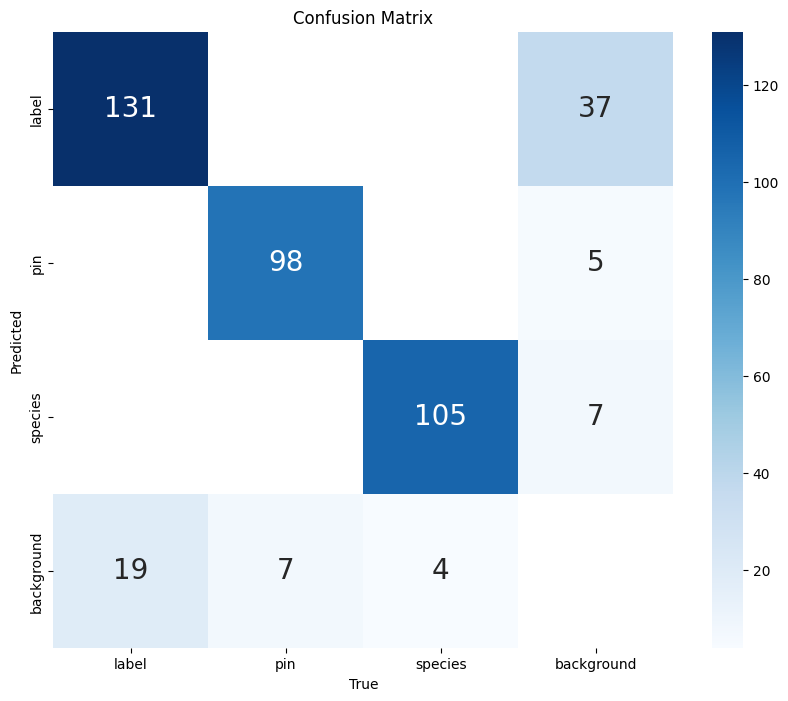

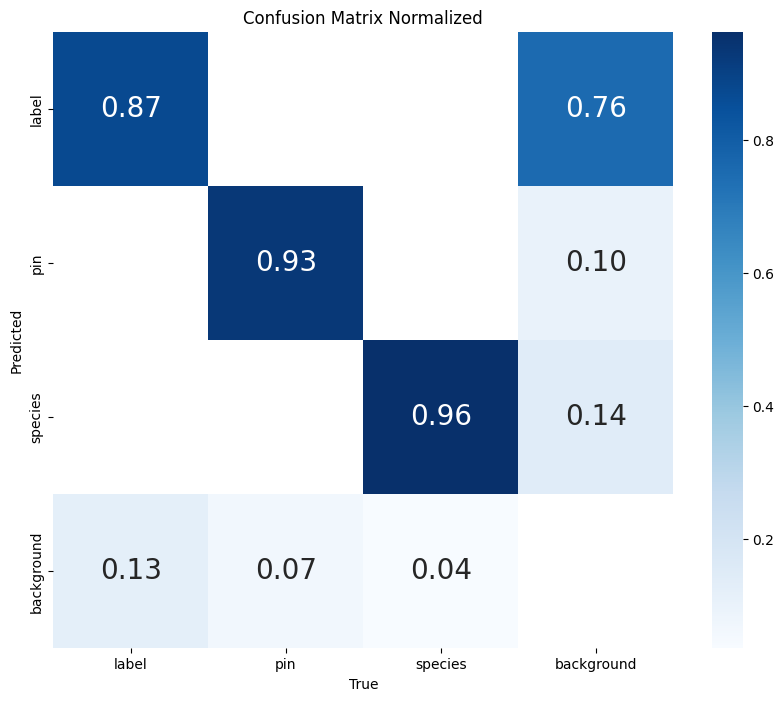

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the confusion matrix data
# data = {
#     "pin_add": [31, 1, 0, 15],
#     "pin_label": [1, 102, 0, 6],
#     "species": [0, 0, 106, 9],
#     "background": [39, 2, 3, 0],
# }

data = {
    "label": [131, 0, 0, 19],
    "pin": [0, 98, 0, 7],
    "species": [0, 0, 105, 4],
    "background": [37, 5, 7, 0],
}

# Create the DataFrame
confusion_matrix = pd.DataFrame(data, index=["label", "pin", "species", "background"])

# Create a mask for zero values
mask_zero_values = confusion_matrix == 0

# Display the original confusion matrix with a color bar, masking zeros
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, annot_kws={"size": 20}, fmt="d", cmap="Blues", cbar=True, mask=mask_zero_values)
plt.title("Confusion Matrix")
plt.xlabel("True")
plt.ylabel("Predicted")
#plt.show()
plt.savefig("./images/cm_pin.png")

# Normalize the confusion matrix by precision (column-wise normalization)
column_sums = confusion_matrix.sum(axis=0)
normalized_confusion_matrix = confusion_matrix / column_sums

# Create a mask for zero values in the normalized matrix
mask_normalized_zero_values = normalized_confusion_matrix == 0

# Display the normalized confusion matrix, masking zeros
plt.figure(figsize=(10, 8))
sns.heatmap(normalized_confusion_matrix, annot=True, annot_kws={"size": 20}, fmt=".2f", cmap="Blues", cbar=True, mask=mask_normalized_zero_values)
plt.title("Confusion Matrix Normalized")
plt.xlabel("True")
plt.ylabel("Predicted")
#plt.show()
plt.savefig("./images/cm_norm_pin.png")


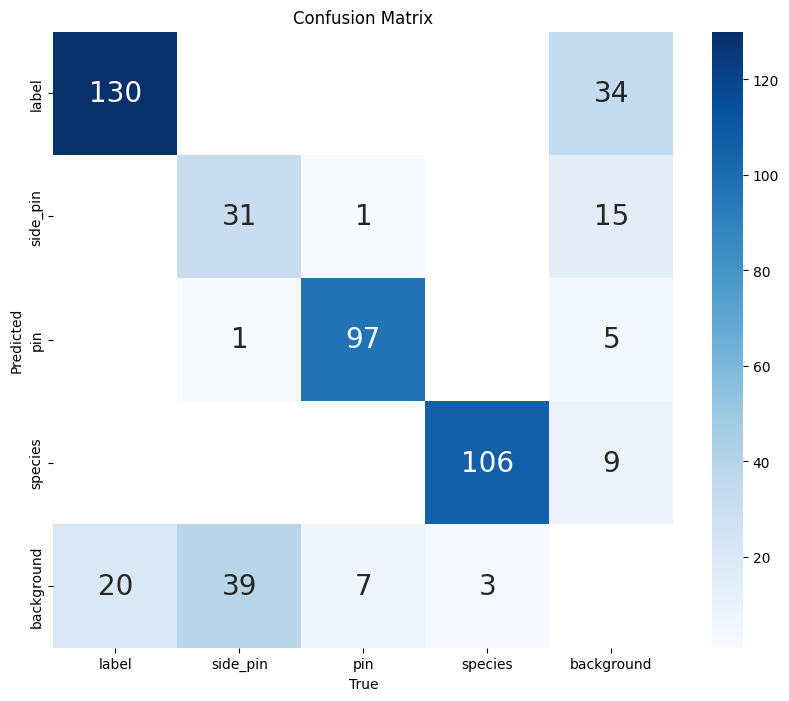

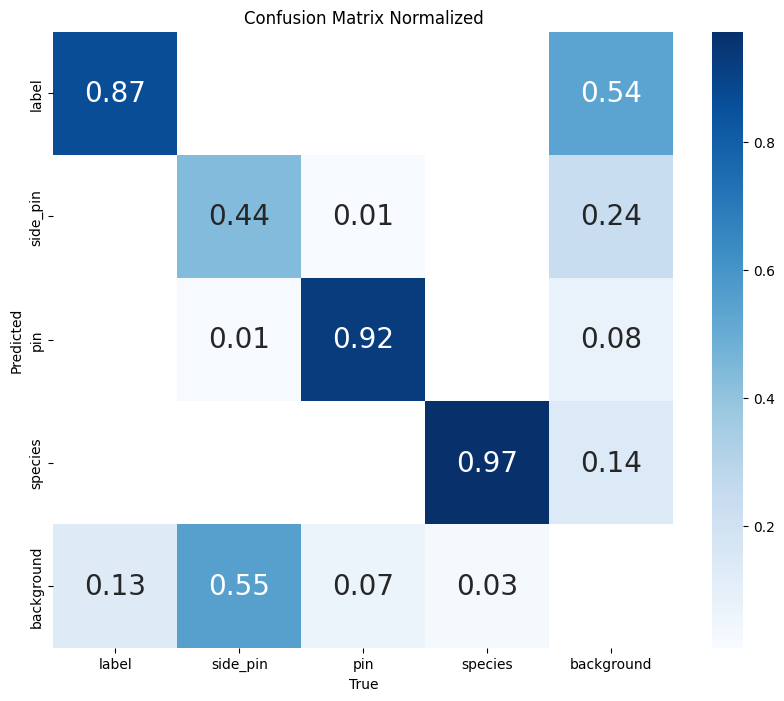

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the confusion matrix data
# data = {
#     "pin_add": [31, 1, 0, 15],
#     "pin_label": [1, 102, 0, 6],
#     "species": [0, 0, 106, 9],
#     "background": [39, 2, 3, 0],
# }

data = {
    "label": [130, 0, 0, 0, 20],
    "side_pin": [0, 31, 1, 0, 39],
    "pin": [0, 1, 97, 0, 7],
    "species": [0, 0, 0, 106, 3],
    "background": [34, 15, 5, 9, 0],
}

# Create the DataFrame
confusion_matrix = pd.DataFrame(data, index=["label", "side_pin", "pin", "species", "background"])

# Create a mask for zero values
mask_zero_values = confusion_matrix == 0

# Display the original confusion matrix with a color bar, masking zeros
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, annot_kws={"size": 20}, fmt="d", cmap="Blues", cbar=True, mask=mask_zero_values)
plt.title("Confusion Matrix")
plt.xlabel("True")
plt.ylabel("Predicted")
#plt.show()
plt.savefig("./images/cm_2pin.png")

# Normalize the confusion matrix by precision (column-wise normalization)
column_sums = confusion_matrix.sum(axis=0)
normalized_confusion_matrix = confusion_matrix / column_sums

# Create a mask for zero values in the normalized matrix
mask_normalized_zero_values = normalized_confusion_matrix == 0

# Display the normalized confusion matrix, masking zeros
plt.figure(figsize=(10, 8))
sns.heatmap(normalized_confusion_matrix, annot=True, annot_kws={"size": 20}, fmt=".2f", cmap="Blues", cbar=True, mask=mask_normalized_zero_values)
plt.title("Confusion Matrix Normalized")
plt.xlabel("True")
plt.ylabel("Predicted")
#plt.show()
plt.savefig("./images/cm_norm_2pin.png")

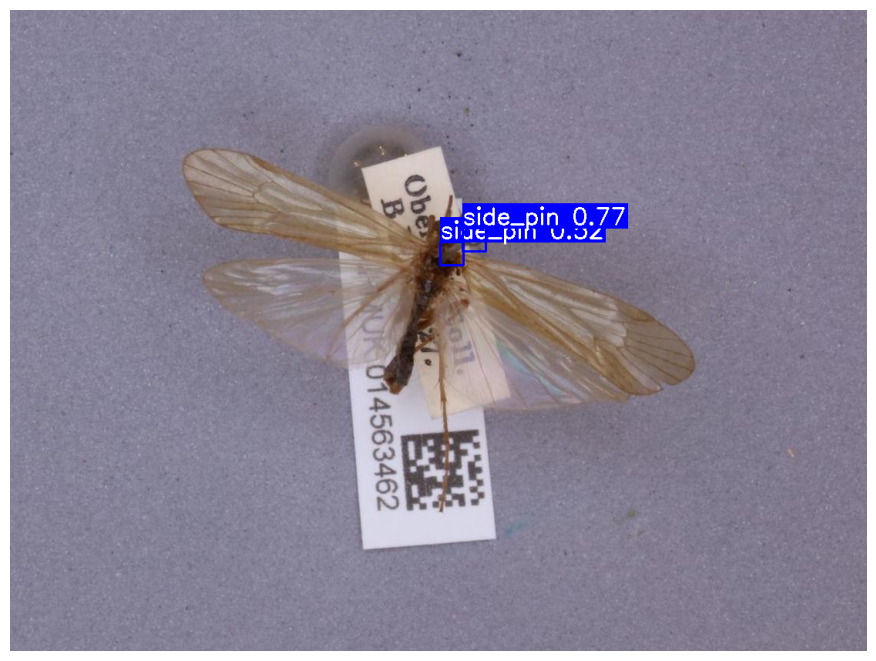

In [34]:
import cv2
import matplotlib.pyplot as plt

# Sample YOLO format detection data

detection_data = [x.split(" ") for x in '''0 0.46295761078998077 0.7533333333333333 0.03829479768786127 0.048 0.89
1 0.5113102119460501 0.5020874316939891 0.02241811175337187 0.025278688524590164 0.57
0 0.5095953757225434 0.5003606557377049 0.02035645472061657 0.0233879781420765 0.56'''.split("\n")]
image_path = r"C:\Users\Frank\Desktop\ucl\EDS\0034final\demo\demo2\train\images\010355929_jpeg.rf.e1474283ee16d5422edac563cf6b9f8c.jpg"

detection_data = [x.split(" ") for x in '''1 0.5154946043165468 0.3816686674669868 0.027715827338129495 0.03807923169267707 0.52
1 0.5421942446043165 0.3594717887154862 0.028237410071942446 0.03786314525810324 0.77'''.split("\n")]
image_path = r"C:\Users\Frank\Desktop\ucl\EDS\0034final\demo\demo2\train\images\014563462_jpeg.rf.8c5206483e09e4db844dd3027836b08f.jpg"

image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Image dimensions
height, width, _ = image.shape

# Class labels
class_labels = {0: 'pin', 1: 'side_pin'}

# Annotate the image with the detection boxes and labels with white text and background color matching the box
image = cv2.imread(image_path)  # Reload the original image

for detection in detection_data:
    class_id, x_center, y_center, w, h, score= int(detection[0]), \
        float(detection[1]), float(detection[2]), float(detection[3]), float(detection[4]) , float(detection[5])
    x_center, y_center, w, h = int(x_center * width), int(y_center * height), int(w * width), int(h * height)
    x1, y1, x2, y2 = x_center - w // 2, y_center - h // 2, x_center + w // 2, y_center + h // 2
    
    # Draw the rectangle
    color = (0, 255, 0) if class_id == 0 else (255, 0, 0)
    cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
    
    # Prepare the label
    label = f"{class_labels[class_id]} {score}"
    (text_width, text_height), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 1, 2)
    
    # Draw the background rectangle for text
    cv2.rectangle(image, (x1, y1 - text_height - baseline), (x1 + text_width, y1), color, -1)
    
    # Put the class label text in white
    cv2.putText(image, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

# Convert image back to RGB for plotting
image_rgb_annotated = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the annotated image
plt.figure(figsize=(width / 100, height / 100), dpi=100)
plt.imshow(image_rgb_annotated)
plt.axis('off')
# plt.savefig(r"C:\Users\Frank\Desktop\ucl\EDS\0034final\demo\demo2\010355929.png", bbox_inches='tight', pad_inches=0, dpi=100)
plt.savefig(r"C:\Users\Frank\Desktop\ucl\EDS\0034final\demo\demo2\014563462.png", bbox_inches='tight', pad_inches=0, dpi=100)
plt.show()